# CLASSIFICATION-- CUSTOMER CHURN PREDICTION 

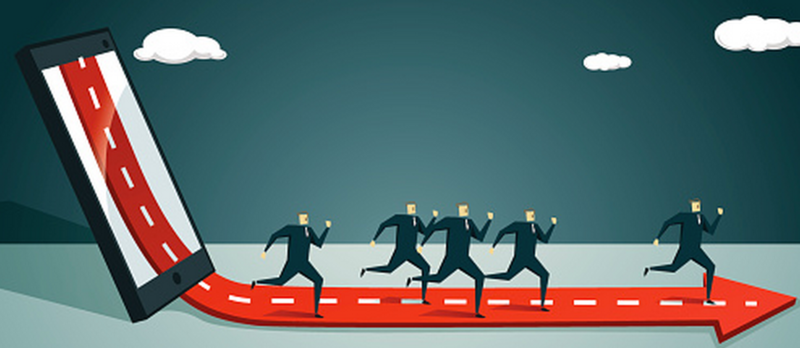

# Introduction (What is Customer Churn?)

Customer churn is when customers or subscribers discontinue doing business with a firm or service.

To be simple, it is when customers stops being your customer.

Telco churn data includes information about a fictitious telecom company that provided home phone and Internet services to 7,043 California customers in the third quarter. Which customers have left, stayed, or signed up for their service shows?

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

# Installation

In [1]:
# !pip install xgboost

# Importation

In [2]:
# Data handling
import pandas as pd
import numpy as np
import threadpoolctl
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )

# Statistics
from scipy import stats

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from collections import Counter

# balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from statistics import stdev
from sklearn.model_selection import KFold

# Other packages
import os, pickle

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [3]:
data = pd.read_csv('../assets/data/Train_data.csv')
test = pd.read_csv('../assets/data/test_data.csv')

# Exploratory Data Analysis

## Hypothesis

H0: The sample has a Gaussian distribution in the numerical feautures.

H1: The sample does not have a Gaussian distribution in the numerical feautures.

## Questions

1. Does longer tenure increase churn?
2. Is there any pattern in Customer Churn based on gender?
3. Which type of contract keeps more customers?
4. What's the most profitable Internetservice type?

## Issues with the data

1. Some of the columns are irrelevant.
2. some of the columns are not in their respective data types.
3. The data values in the column payments method needs is not good for readability.
4. The data has missing values

## How I Intend to Solve Them

1. Drop irrelevant columns
2. Replace the correct data types in their respective columns
3. Rename the data values for better readability.


In [4]:
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [5]:
data.shape

(2351, 25)

In [6]:
# summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

Disease column is an object but it is supposed to be int (value of 1 or 0) so let's have a closer look

In [7]:
data['Disease'].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc'],
      dtype=object)

change values of the Disease column to a simple yes or no

In [8]:
data['Disease'] = data['Disease'].apply(lambda x: 'Yes' if x == 'Healthy' else 'No')
test['Disease'] = test['Disease'].apply(lambda x: 'Yes' if x == 'Healthy' else 'No') #same for test data

In [9]:
data.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


In [10]:
# Check of outliers by applying the IQR method checking
df = data.drop('Disease', axis=1)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR
((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any()


Glucose                                      False
Cholesterol                                  False
Hemoglobin                                   False
Platelets                                    False
White Blood Cells                            False
Red Blood Cells                              False
Hematocrit                                   False
Mean Corpuscular Volume                      False
Mean Corpuscular Hemoglobin                  False
Mean Corpuscular Hemoglobin Concentration    False
Insulin                                      False
BMI                                          False
Systolic Blood Pressure                      False
Diastolic Blood Pressure                     False
Triglycerides                                False
HbA1c                                        False
LDL Cholesterol                              False
HDL Cholesterol                              False
ALT                                          False
AST                            

The results above showed there are no outliers

Rename the columns for better readability.

In [11]:
def renamer(df):
    df.rename(columns={
        'Cholesterol': 'Cholesterol Level (mg/dL)',
        'Hemoglobin': 'Hemoglobin (g/dL)',
        'Platelets': 'Platelet Count (10^9/L)',
        'White Blood Cells': 'White Blood Cell Count (10^3/µL)',
        'Red Blood Cells': 'Red Blood Cell Count (10^6/µL)',
        'Hematocrit': 'Hematocrit (%)',
        'Mean Corpuscular Volume': 'Mean Corpuscular Volume (fL)',
        'Mean Corpuscular Hemoglobin': 'Mean Corpuscular Hemoglobin (pg)',
        'Mean Corpuscular Hemoglobin Concentration': 'Mean Corpuscular Hemoglobin Concentration (g/dL)',
        'Insulin': 'Insulin Level (µU/mL)',
        'BMI': 'Body Mass Index (kg/m^2)',
        'Systolic Blood Pressure': 'Systolic Blood Pressure (mmHg)',
        'Diastolic Blood Pressure': 'Diastolic Blood Pressure (mmHg)',
        'Triglycerides': 'Triglyceride Level (mg/dL)',
        'HbA1c': 'Glycated Hemoglobin (HbA1c) (%)',
        'LDL Cholesterol': 'LDL Cholesterol Level (mg/dL)',
        'HDL Cholesterol': 'HDL Cholesterol Level (mg/dL)',
        'ALT': 'Alanine Aminotransferase (U/L)',
        'AST': 'Aspartate Aminotransferase (U/L)',
        'Heart Rate': 'Heart Rate (bpm)',
        'Creatinine': 'Creatinine Level (mg/dL)',
        'Troponin': 'Troponin Level (ng/mL)',
        'C-reactive Protein': 'C-reactive Protein Level (mg/L)'
    }, inplace=True)
renamer(data)
renamer(test)

## Multivariate Analysis

<Axes: xlabel='Heart Rate (bpm)', ylabel='Count'>

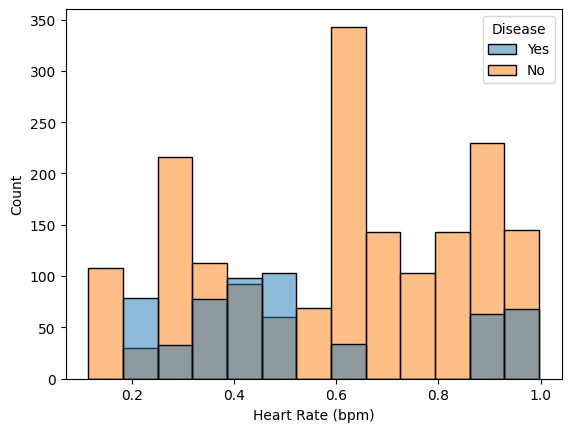

In [12]:
sns.histplot(data=data,
            x='Heart Rate (bpm)',
            hue='Disease', alpha=0.5)

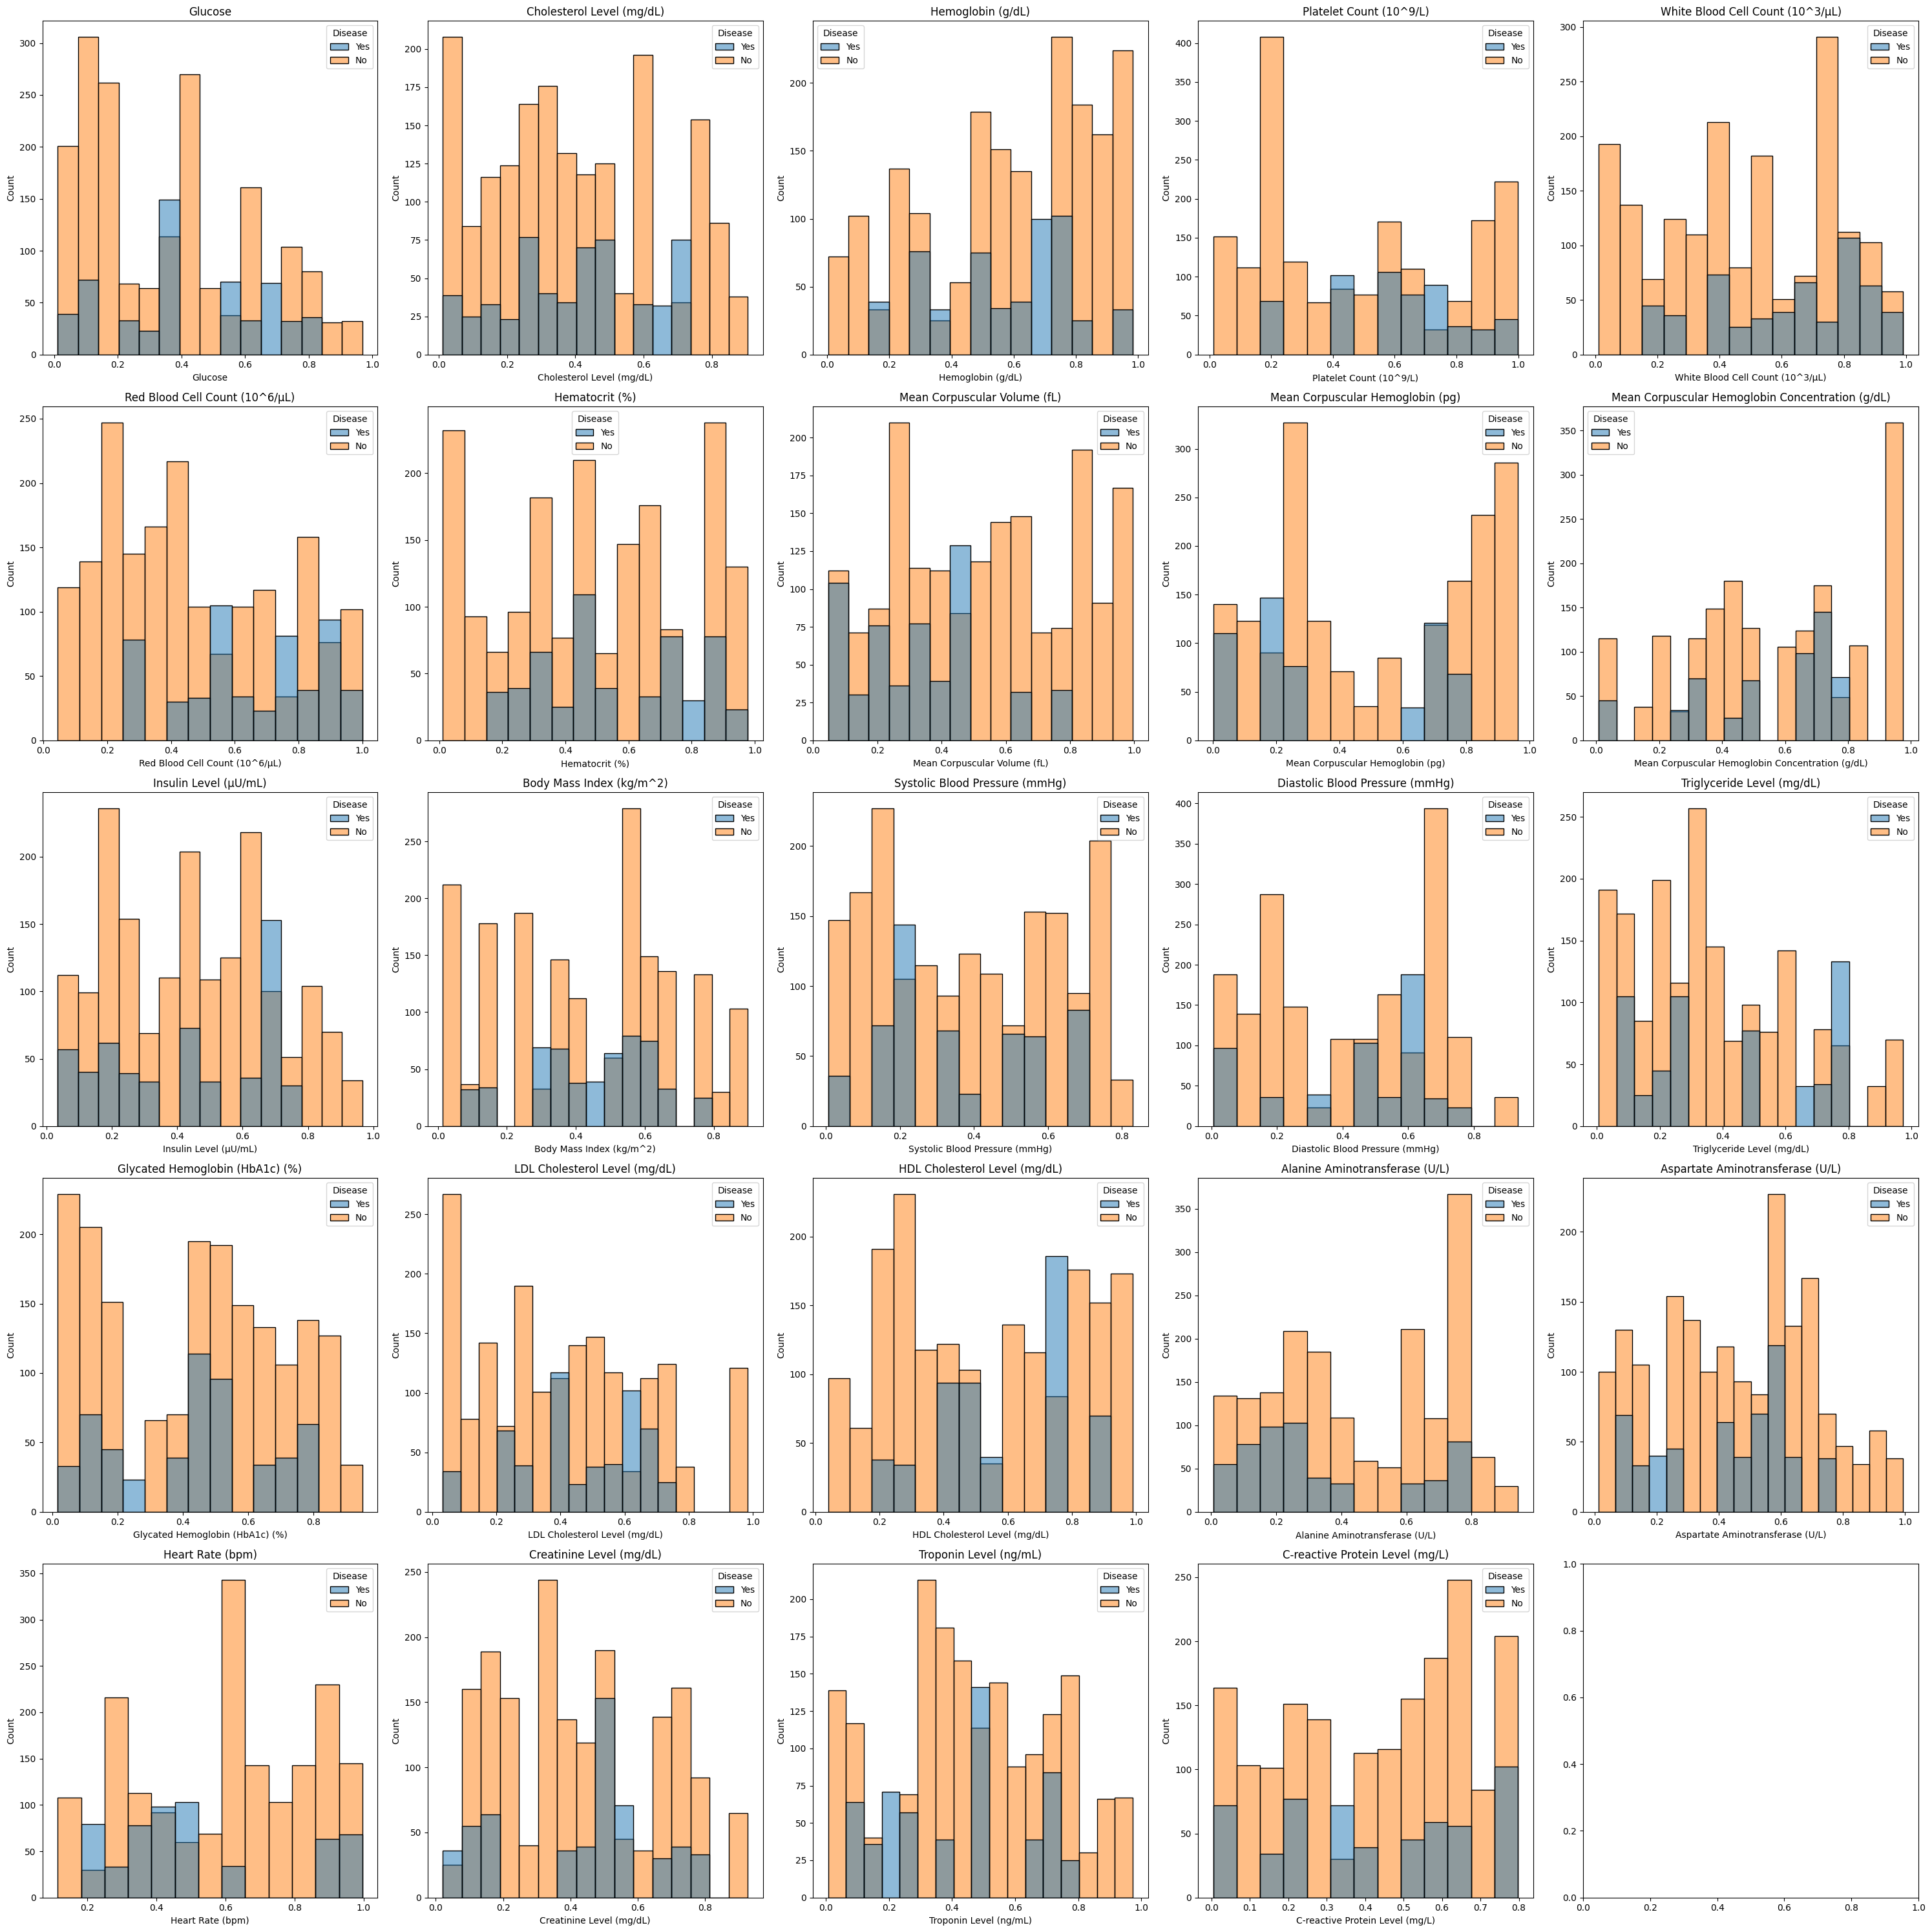

In [13]:
# Setup figure
cols = 5
rows = 5
fig, axes = plt.subplots(rows, cols, figsize=(30, 30))

# Flatten axes for easy iteration
axes = axes.flatten()

# Columns excluding 'Disease'
columns_to_plot = [col for col in data.columns if col != 'Disease']

# Iterate over each column
for i, column in enumerate(columns_to_plot):
    # Plot histogram for the current column
    sns.histplot(data=data, x=column, hue='Disease', alpha=0.5, ax=axes[i])
    axes[i].set_title(column)  # Set title for the subplot
plt.tight_layout()
plt.show()

It seems that white blood cell count and Alanine Aminotransferase (U/L) 
have little or no effect on disease possibility

<Axes: >

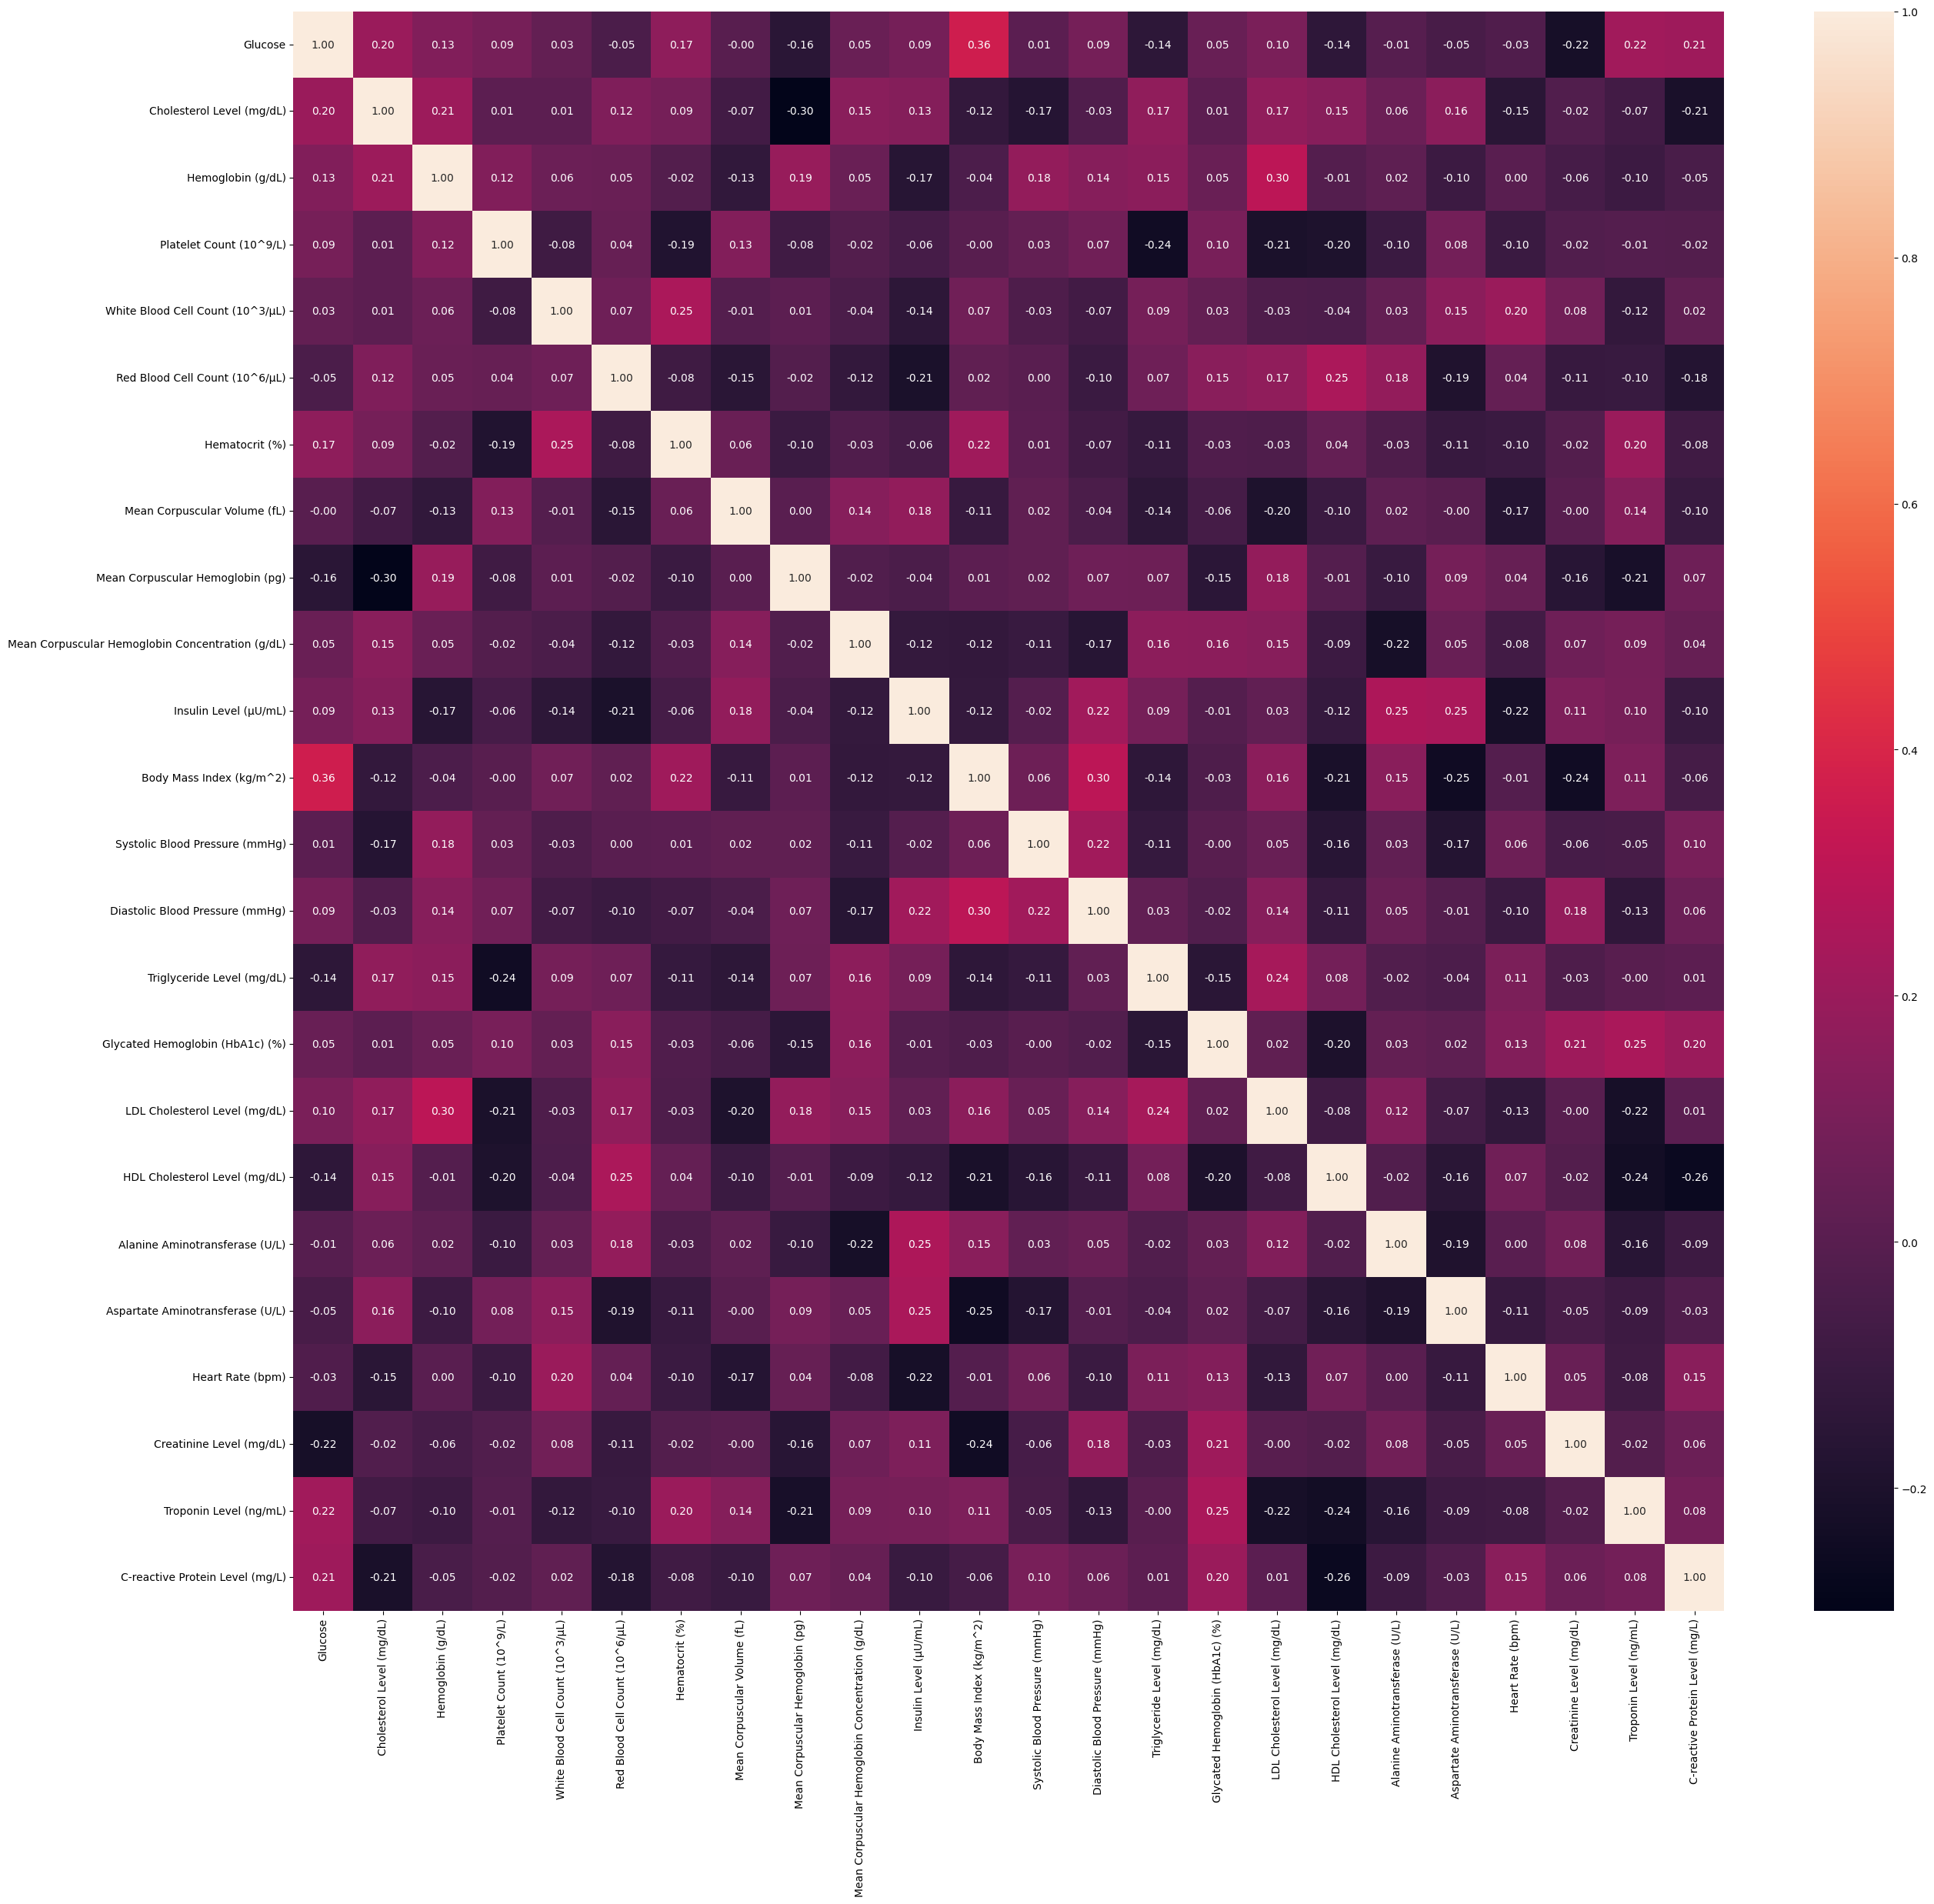

In [14]:
# Set figure size
plt.figure(figsize=(30, 27))

# correlation heatmap df
correlation = data.drop('Disease', axis=1).corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [15]:
# correlation heatmap df
correlation = data.drop('Disease', axis=1).corr()

# Get column pairs with correlation > 0.5
high_corr_pairs = []
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if abs(correlation.iloc[i, j]) > 0.5:
            high_corr_pairs.append((correlation.columns[i], correlation.columns[j]))

# Check if there are high correlation pairs
if high_corr_pairs:
    # Print column pairs with correlation > 0.5
    for pair in high_corr_pairs:
        print(pair)
else:
    print("No high correlation columns")

No high correlation columns


## Hypothesis validation

## Statistical Normality Tests

Normality tests are used to determine if a dataset is normally distributed about the mean value. it is assumed that during any measurement values will follow a normal distribution with an equal number of measurements above and below the mean value.

on the other hand, Gaussian distribution is a continuous probability distribution with symmetrical sides around its center. Its mean, median and mode are equal.

Popular normality tests - D’Agostino’s K^2, Shapiro-Wilk, Anderson-Darling .

### D’Agostino’s K^2 Test

In [16]:
cols = data.columns.tolist()
cols.remove('Disease')

for col in cols:
    stat, p = stats.normaltest(data[column])
    # print('Statistics=%.5f, p=%.3f' % (stat, p))

    # interpret
    alpha = 0.05
    if p > alpha:
        print(f'looks Gaussian (fail to reject H0) for this column: {col}')
    else:
        print(f'does not look Gaussian (reject H0) for this column: {col}')


does not look Gaussian (reject H0) for this column: Glucose
does not look Gaussian (reject H0) for this column: Cholesterol Level (mg/dL)
does not look Gaussian (reject H0) for this column: Hemoglobin (g/dL)
does not look Gaussian (reject H0) for this column: Platelet Count (10^9/L)
does not look Gaussian (reject H0) for this column: White Blood Cell Count (10^3/µL)
does not look Gaussian (reject H0) for this column: Red Blood Cell Count (10^6/µL)
does not look Gaussian (reject H0) for this column: Hematocrit (%)
does not look Gaussian (reject H0) for this column: Mean Corpuscular Volume (fL)
does not look Gaussian (reject H0) for this column: Mean Corpuscular Hemoglobin (pg)
does not look Gaussian (reject H0) for this column: Mean Corpuscular Hemoglobin Concentration (g/dL)
does not look Gaussian (reject H0) for this column: Insulin Level (µU/mL)
does not look Gaussian (reject H0) for this column: Body Mass Index (kg/m^2)
does not look Gaussian (reject H0) for this column: Systolic Bl

## Anwering Questions

## 1. Does longer tenure increase churn?
customers with longer tenure have less churn rate.

In [17]:
# sns.pairplot(data,vars = ['tenure','MonthlyCharges'], hue="Churn")

## 2. Is there any pattern in Customer Churn based on gender?
The plot below shows that churn for both genders is very similar.

In [18]:
# sns.countplot(data = data, 
#               x = 'gender', 
#               hue = 'Churn')
# plt.show()

## 3. Which type of contract keeps more customers?
Churn rate for month-to-month contracts much higher that for other contract durations.

In [19]:
# sns.countplot(data = data, 
#               x = 'Contract', 
#               hue = 'Churn')
# plt.show()

## 4. What's the most profitable Internetservice type
FiberOptic InternetService keeps more customers

In [20]:
# sns.countplot(data = data, 
#               x = 'InternetService', 
#               hue = 'Churn')
# plt.show()

# Feature Processing & Engineering

## Drop Duplicates

In [21]:
data.shape

(2351, 25)

In [22]:
data.duplicated().sum()

2286

the duplicates are too many so let's have a closer look

In [23]:
dup = data.loc[data.duplicated(),:]
dup.head(22)

,Glucose,Cholesterol Level (mg/dL),Hemoglobin (g/dL),Platelet Count (10^9/L),White Blood Cell Count (10^3/µL),Red Blood Cell Count (10^6/µL),Hematocrit (%),Mean Corpuscular Volume (fL),Mean Corpuscular Hemoglobin (pg),Mean Corpuscular Hemoglobin Concentration (g/dL),...,Glycated Hemoglobin (HbA1c) (%),LDL Cholesterol Level (mg/dL),HDL Cholesterol Level (mg/dL),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Heart Rate (bpm),Creatinine Level (mg/dL),Troponin Level (ng/mL),C-reactive Protein Level (mg/L),Disease
9,0.399017,0.508254,0.777394,0.096310,0.925520,0.652505,0.684896,0.380656,0.248189,0.490245,...,0.673188,0.033037,0.772045,0.253892,0.322486,0.659069,0.774219,0.714177,0.609177,No
21,0.722428,0.300282,0.487907,0.200865,0.402035,0.729285,0.851338,0.820546,0.106637,0.006947,...,0.022621,0.061317,0.644191,0.715823,0.417170,0.639148,0.213026,0.549920,0.036800,No
24,0.016514,0.615418,0.577672,0.561694,0.837087,0.479954,0.295866,0.722293,0.916096,0.218293,...,0.079865,0.462098,0.292551,0.686779,0.714632,0.298837,0.718824,0.298533,0.030796,No
25,0.377112,0.391959,0.577246,0.573482,0.685303,0.605134,0.472465,0.098744,0.721378,0.319725,...,0.646206,0.657711,0.307132,0.261195,0.404761,0.599542,0.477714,0.277383,0.607319,Yes
26,0.032726,0.053596,0.102633,0.221356,0.153956,0.216573,0.312577,0.608940,0.486174,0.450700,...,0.188750,0.331887,0.562622,0.680462,0.099538,0.982893,0.437285,0.288961,0.709262,No
28,0.016514,0.615418,0.577672,0.561694,0.837087,0.479954,0.295866,0.722293,0.916096,0.218293,...,0.079865,0.462098,0.292551,0.686779,0.714632,0.298837,0.718824,0.298533,0.030796,No
29,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,No
31,0.596150,0.294839,0.261010,0.617652,0.129569,0.245358,0.035437,0.287532,0.056466,0.800497,...,0.738542,0.075263,0.250968,0.066292,0.710427,0.893397,0.704437,0.590517,0.728163,No
33,0.377112,0.391959,0.577246,0.573482,0.685303,0.605134,0.472465,0.098744,0.721378,0.319725,...,0.646206,0.657711,0.307132,0.261195,0.404761,0.599542,0.477714,0.277383,0.607319,Yes
34,0.399017,0.508254,0.777394,0.096310,0.925520,0.652505,0.684896,0.380656,0.248189,0.490245,...,0.673188,0.033037,0.772045,0.253892,0.322486,0.659069,0.774219,0.714177,0.609177,No


those do not look like duplicates, so we'll ignore

## Creating new features

In [ ]:
columns_to_keep = [
    'Mean Corpuscular Hemoglobin (pg)',
    'Mean Corpuscular Volume (fL)',
    'Hematocrit (%)',
    'White Blood Cell Count (10^3/µL)',
    'Cholesterol Level (mg/dL)',
    'Platelet Count (10^9/L)',
    'White Blood Cell Count (10^3/µL)',
    'Glucose'
]

columns_to_drop = [col for col in data.columns if col not in columns_to_keep]
data.drop(columns=columns_to_drop, inplace=True, axis=1)
test.drop(columns=columns_to_drop, inplace=True, axis=1)


## Impute Missing Values

In [24]:
data.isnull().sum()

Glucose                                             0
Cholesterol Level (mg/dL)                           0
Hemoglobin (g/dL)                                   0
Platelet Count (10^9/L)                             0
White Blood Cell Count (10^3/µL)                    0
Red Blood Cell Count (10^6/µL)                      0
Hematocrit (%)                                      0
Mean Corpuscular Volume (fL)                        0
Mean Corpuscular Hemoglobin (pg)                    0
Mean Corpuscular Hemoglobin Concentration (g/dL)    0
Insulin Level (µU/mL)                               0
Body Mass Index (kg/m^2)                            0
Systolic Blood Pressure (mmHg)                      0
Diastolic Blood Pressure (mmHg)                     0
Triglyceride Level (mg/dL)                          0
Glycated Hemoglobin (HbA1c) (%)                     0
LDL Cholesterol Level (mg/dL)                       0
HDL Cholesterol Level (mg/dL)                       0
Alanine Aminotransferase (U/

In [25]:
# Drop the missing rows
data = data.dropna()

# Features Encoding

In [26]:
df=data
data['Disease'] = data['Disease'].apply(lambda x: 1 if x == 'Yes' else 0)
test['Disease'] = test['Disease'].apply(lambda x: 1 if x == 'Yes' else 0) #same for test data

X = df.drop('Disease', axis=1)
y = df['Disease']

## Data Imbalance Check

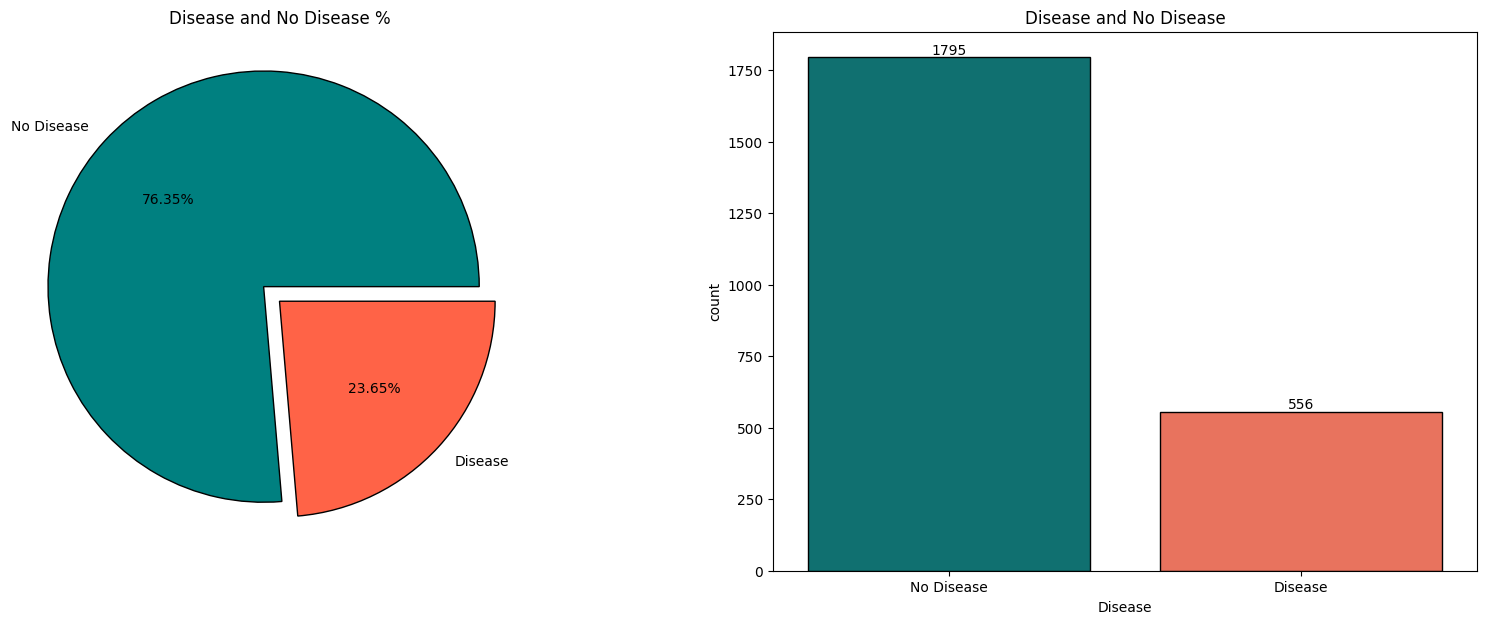

In [27]:
#Defining colors for the plots
palette = ['#008080','#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

l1 = list(data['Disease'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['No Disease','Disease'], 
        autopct = '%1.2f%%',
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Disease and No Disease %');

plt.subplot(1,2,2)
ax = sns.countplot(data = data, 
                   x='Disease',
                   palette = palette, 
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['No Disease','Disease'])
    
plt.title('Disease and No Disease')
plt.show()


Dataset is imbalanced with almost 1:3 ratio. but it's still significant.

This means that a blind guess (on "No Disease") would give us accuracy of 76,35%

Therefore, we can't use Accuracy Score to choose our model

what to do to solve this issue:

1. We could use stratified splitting during train-test split (split the dataset in a way that preserves the same proportions of examples in each class.)
2. We could be extra careful when dealing with outliers (we can delete meaningull information).
3. Resampling Techniques — Oversample minority class or Undersample majority class.

In [28]:
#Oversampling the minority class (the churn customers)
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

After Random Over Sampling Of Minor Class Total Samples are : 3590
Original dataset shape Counter({0: 1795, 1: 556})
Resampled dataset shape Counter({1: 1795, 0: 1795})


Now our data is balanced

In [29]:
X_new

,Glucose,Cholesterol Level (mg/dL),Hemoglobin (g/dL),Platelet Count (10^9/L),White Blood Cell Count (10^3/µL),Red Blood Cell Count (10^6/µL),Hematocrit (%),Mean Corpuscular Volume (fL),Mean Corpuscular Hemoglobin (pg),Mean Corpuscular Hemoglobin Concentration (g/dL),...,Triglyceride Level (mg/dL),Glycated Hemoglobin (HbA1c) (%),LDL Cholesterol Level (mg/dL),HDL Cholesterol Level (mg/dL),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Heart Rate (bpm),Creatinine Level (mg/dL),Troponin Level (ng/mL),C-reactive Protein Level (mg/L)
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,0.042563,0.055290,0.190485,0.565194,0.396966,0.823027,0.528257,0.368484,0.701912,0.772472,...,0.283910,0.393383,0.264929,0.751943,0.351414,0.467027,0.326998,0.185338,0.683323,0.195552
3586,0.693767,0.730686,0.751196,0.747326,0.742084,0.413056,0.820138,0.140164,0.756092,0.488189,...,0.093734,0.755660,0.603351,0.381331,0.274330,0.443498,0.518567,0.645247,0.088596,0.751157
3587,0.389399,0.462404,0.480595,0.228912,0.781088,0.889100,0.201787,0.298939,0.285184,0.669895,...,0.793102,0.102180,0.701782,0.767014,0.749700,0.070974,0.932907,0.382647,0.483517,0.049015
3588,0.799282,0.447299,0.325035,0.825397,0.259467,0.743670,0.434097,0.198072,0.189896,0.305185,...,0.090678,0.430389,0.247775,0.856870,0.710319,0.544838,0.413037,0.021239,0.134822,0.059388


In [30]:
X_new.describe()

,Glucose,Cholesterol Level (mg/dL),Hemoglobin (g/dL),Platelet Count (10^9/L),White Blood Cell Count (10^3/µL),Red Blood Cell Count (10^6/µL),Hematocrit (%),Mean Corpuscular Volume (fL),Mean Corpuscular Hemoglobin (pg),Mean Corpuscular Hemoglobin Concentration (g/dL),...,Triglyceride Level (mg/dL),Glycated Hemoglobin (HbA1c) (%),LDL Cholesterol Level (mg/dL),HDL Cholesterol Level (mg/dL),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Heart Rate (bpm),Creatinine Level (mg/dL),Troponin Level (ng/mL),C-reactive Protein Level (mg/L)
count,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,...,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000
mean,0.384331,0.393351,0.583067,0.535392,0.555474,0.553201,0.528463,0.434838,0.444073,0.558400,...,0.394667,0.433407,0.436822,0.561374,0.403723,0.440760,0.559338,0.425386,0.442459,0.427658
std,0.247428,0.227513,0.253454,0.279747,0.270547,0.263993,0.273579,0.259859,0.310920,0.256586,...,0.260708,0.253902,0.232697,0.248611,0.265822,0.233197,0.251570,0.226146,0.241709,0.244765
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.143772,0.229802,0.360497,0.284489,0.361113,0.315465,0.290006,0.198072,0.189896,0.355774,...,0.189918,0.193010,0.261072,0.341007,0.169325,0.239659,0.335346,0.206610,0.277383,0.195552
50%,0.357817,0.397083,0.597916,0.573482,0.618684,0.529895,0.493428,0.380656,0.305588,0.651724,...,0.317857,0.461701,0.437792,0.538216,0.351414,0.469085,0.518567,0.459722,0.465957,0.477137
75%,0.596150,0.582178,0.776516,0.747326,0.781088,0.801220,0.758897,0.631045,0.756092,0.737577,...,0.653472,0.646206,0.604753,0.772045,0.686779,0.610827,0.800666,0.566370,0.683323,0.632352
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


# Dataset Splitting

In [31]:
X_train, X_test, y_train, y_test = X_new, test.drop('Disease', axis=1), y_new, test['Disease']

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.20, random_state = 42)

In [33]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((3590, 24), (486, 24), (3590,), (486,))

# Features Scaling


In [34]:
# Scaler = StandardScaler().fit(X_train).set_output(transform="pandas")

# X_train = Scaler.transform(X_train)
# X_test = Scaler.transform(X_test)

# Machine Learning Modeling

1. Logistic Regression
2. RandomForest Classifier
3. XGBoost Classifier
4. K Nearest Neighbors
5. Support Vector Machines 
6. DecisionTreeClassifier


## 1.  Logistic Regression

### Create the Model

In [35]:
model= LogisticRegression()

### Train the Model

In [36]:
model=model.fit(X_train, y_train)


###  Predict on the test dataset

In [37]:
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]


### Model Evaluation

In [38]:
r_lgt= recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= f1_score(y_test, pred)
print("f1_score :", f1_lgt)

f2_lgt = fbeta_score(y_test, pred, beta=2, average='binary')
print("f2_score :", f2_lgt)

A_lgt= accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)
     

recall_score :  0.6
precision_score : 0.018518518518518517
f1_score : 0.03592814371257485
f2_score : 0.08241758241758242
accuracy_score : 0.668724279835391
ROC_AUC Score: 0.5061728395061729


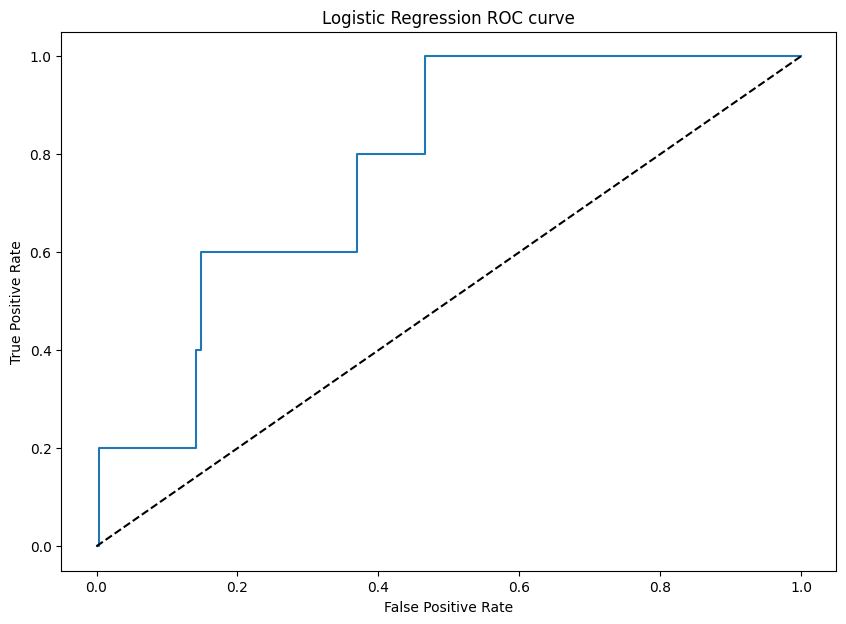

In [39]:
# plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 2. RandomForest Classifier

### Create the Model

In [40]:
RF_model= RandomForestClassifier()

### Train the Model

In [41]:
RF_model= RF_model.fit(X_train, y_train)

### Predict on the test dataset

In [42]:
rf_pred= RF_model.predict(X_test)
rf_proba= RF_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [43]:
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)


f2_rf = fbeta_score(y_test, rf_pred, beta=2, average='binary')
print("f2_score :", f2_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)
     

recall_score :  0.6
precision_score : 0.11538461538461539
f1_score : 0.1935483870967742
f2_score : 0.3260869565217392
accuracy_score : 0.948559670781893
ROC_AUC Score: 0.5555183946488295


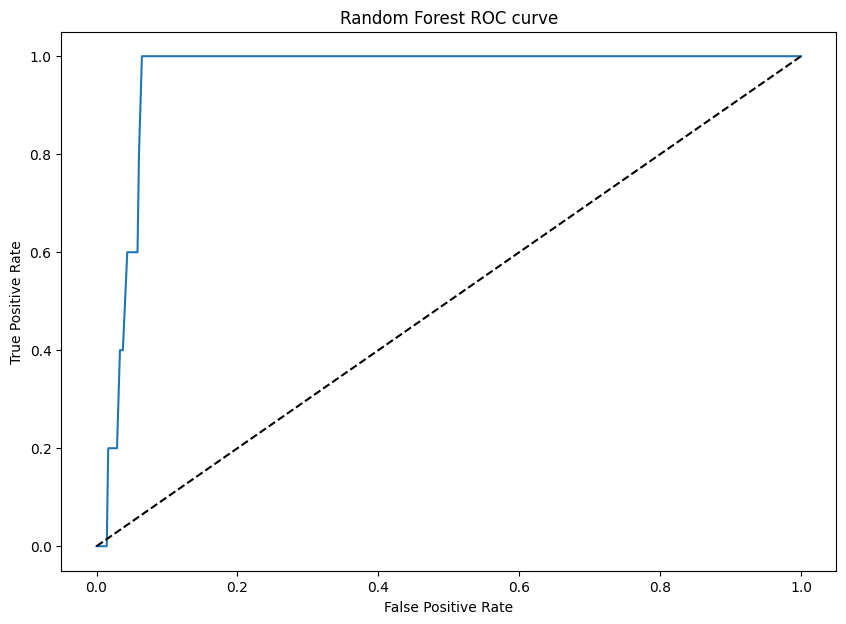

In [44]:
# plot the model evaluation
fig, ax = plt.subplots(figsize=(10,7))
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 3. XGBoost Classifier

### Create the Model

In [45]:
XG_model= XGBClassifier()

### Train the Model

In [46]:
XG_model= XG_model.fit(X_train, y_train)

### Predict on the test dataset

In [47]:
XG_pred = XG_model.predict(X_test)
XG_prob = XG_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [48]:
r_XG= recall_score(y_test, XG_pred)
print("recall_score : ", r_XG)

p_XG= precision_score(y_test, XG_pred)
print("precision_score :",p_XG)

f1_XG= f1_score(y_test, XG_pred)
print("f1_score :", f1_XG)

f2_XG = fbeta_score(y_test, XG_pred, beta=2, average='binary')
print("f2_score :", f2_XG)


A_XG= accuracy_score( y_test, XG_pred)
print("accuracy_score :",A_XG)

acu_XG = roc_auc_score(XG_pred, y_test)
print("ROC_AUC Score:",acu_XG)
     

recall_score :  1.0
precision_score : 0.0684931506849315
f1_score : 0.1282051282051282
f2_score : 0.26881720430107525
accuracy_score : 0.8600823045267489
ROC_AUC Score: 0.5342465753424658


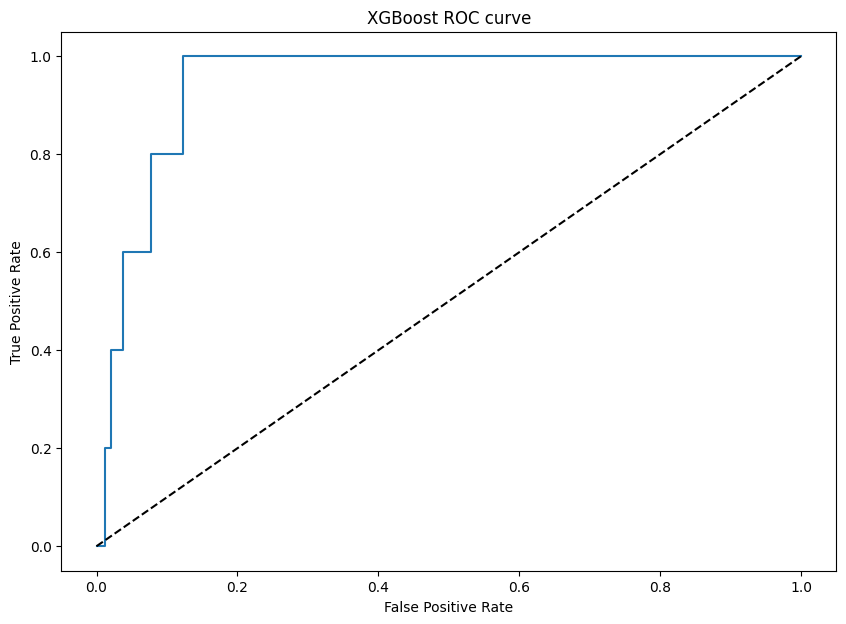

In [49]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, XG_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 4. K Nearest Neighbors


### Create the Model

In [50]:
KNN_model = KNeighborsClassifier()


### Train the Model

In [51]:
KNN_model = KNN_model.fit(X_train, y_train)

### Predict on the test dataset

In [52]:
KNN_pred = KNN_model.predict(X_test)
KNN_prob = KNN_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [53]:
r_KNN= recall_score(y_test, KNN_pred)
print("recall_score : ", r_KNN)

p_KNN= precision_score(y_test, KNN_pred)
print("precision_score :",p_KNN)

f1_KNN= f1_score(y_test, KNN_pred)
print("f1_score :", f1_KNN)

f2_KNN = fbeta_score(y_test, KNN_pred, beta=2, average='binary')
print("f2_score :", f2_KNN)


A_KNN= accuracy_score( y_test, KNN_pred)
print("accuracy_score :", A_KNN)

acu_KNN = roc_auc_score(KNN_pred, y_test)
print("ROC_AUC Score:",acu_KNN)

recall_score :  0.6
precision_score : 0.016129032258064516
f1_score : 0.031413612565445025
f2_score : 0.07281553398058252
accuracy_score : 0.6193415637860082
ROC_AUC Score: 0.5047311827956988


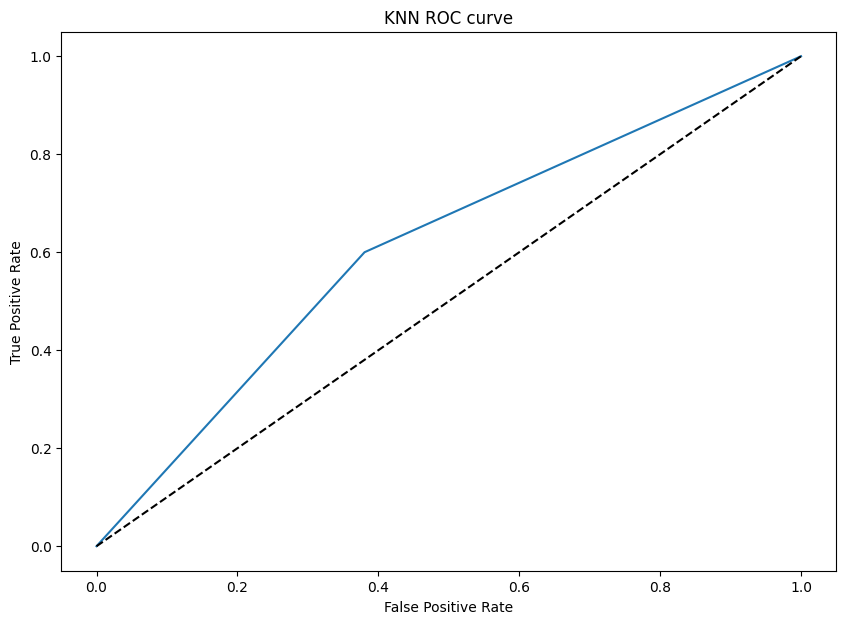

In [54]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, KNN_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 5. Support Vector Machines

### Create the Model

In [55]:
SVC_model = SVC(kernel='rbf',
                C=51,
                gamma=1,
                probability=True)

### Train the Model

In [56]:
SVC_model = SVC_model.fit(X_train, y_train)

### Predict on the test dataset

In [57]:
SVC_pred = SVC_model.predict(X_test)
SVC_prob = SVC_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [58]:
r_SVC= recall_score(y_test, SVC_pred)
print("recall_score : ", r_SVC)

p_SVC= precision_score(y_test, SVC_pred)
print("precision_score :",p_SVC)

f1_SVC= f1_score(y_test, SVC_pred)
print("f1_score :", f1_SVC)

f2_SVC = fbeta_score(y_test, SVC_pred, beta=2, average='binary')
print("f2_score :", f2_SVC)


A_SVC= accuracy_score( y_test, SVC_pred)
print("accuracy_score :", A_SVC)

acu_SVC = roc_auc_score(SVC_pred, y_test)
print("ROC_AUC Score:",acu_SVC)

recall_score :  0.2
precision_score : 0.3333333333333333
f1_score : 0.25
f2_score : 0.21739130434782608
accuracy_score : 0.9876543209876543
ROC_AUC Score: 0.6625258799171841


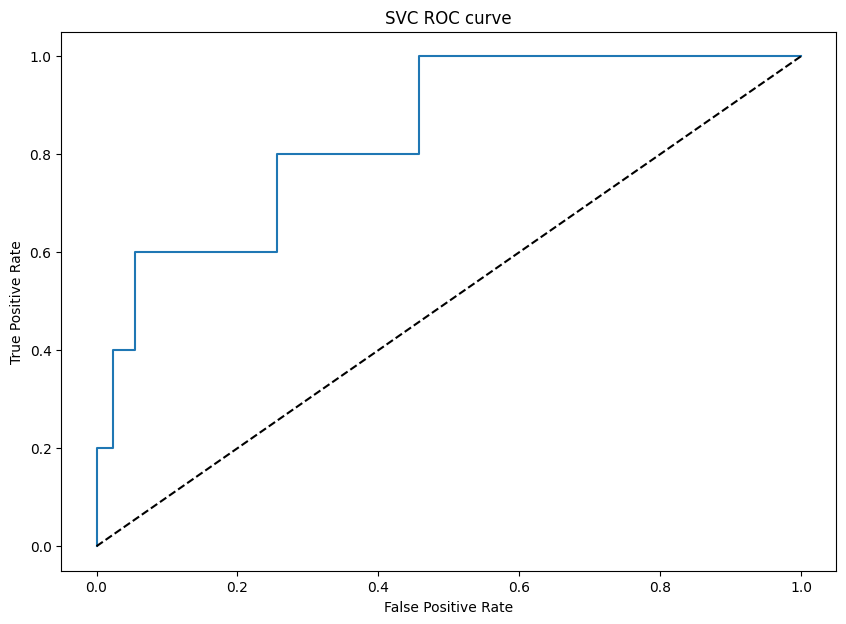

In [59]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, SVC_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('SVC ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

##  6. DecisionTreeClassifier

### Create the Model

In [60]:
dtmodel = DecisionTreeClassifier()

### Train the Model

In [61]:
dtmodel = dtmodel.fit(X_train, y_train)

### Predict on the test dataset

In [62]:
dt_pred = dtmodel.predict(X_test)
dt_prob = dtmodel.predict_proba(X_test)[:,1]

### Model Evaluation

In [63]:
r_dt= recall_score(y_test, dt_pred)
print("recall_score : ", r_dt)

p_dt= precision_score(y_test, dt_pred)
print("precision_score :",p_dt)

f1_dt= f1_score(y_test, dt_pred)
print("f1_score :", f1_dt)

f2_dt = fbeta_score(y_test, dt_pred, beta=2, average='binary')
print("f2_score :", f2_dt)


A_dt= accuracy_score( y_test, dt_pred)
print("accuracy_score :", A_dt)

acu_dt = roc_auc_score(dt_pred, y_test)
print("ROC_AUC Score:",acu_dt)

recall_score :  1.0
precision_score : 0.07142857142857142
f1_score : 0.13333333333333333
f2_score : 0.2777777777777778
accuracy_score : 0.8662551440329218
ROC_AUC Score: 0.5357142857142857


# Models comparison

False Negatives:

False negatives occur when the model incorrectly predicts that a patient does not have the disease when, in reality, they do.
The consequence of a false negative is that the patient may not receive necessary treatment or intervention, potentially leading to undetected or untreated health issues. This can result in the progression of the disease, worsening health outcomes, and possibly even life-threatening situations if the disease is serious.

Given that false negatives are more costly in this medical diagnosis classification project, and I've balanced the classes using Random Over Sampler, it's advisable to prioritize metrics that focus on minimizing false negatives.

In this context, the most appropriate metric to use would be recall or the F2 score. Both of these metrics emphasize the minimization of false negatives, making them suitable for scenarios where the cost of missing positive cases (i.e., false negatives) is high.

In [64]:
compare_models = ['Logistic Regression','Randomforest','XGBClassifier','K Nearest Neighbors','Support Vector Machines','DecisionTreeClassifier']

data={'Accuracy':[A_lgt,A_rf,A_XG,A_KNN,A_SVC,A_dt],
      'Recall':[r_lgt,r_rf, r_XG,r_KNN,r_SVC,r_dt],
      'Precision':[p_lgt, p_rf, p_XG,p_KNN,p_SVC,p_dt], 
      'f1_score':[f1_lgt, f1_rf, f1_XG,f1_KNN,f1_SVC,f1_dt], 
      'f2_score':[f2_lgt,f2_rf,f2_XG,f2_KNN,f2_SVC,f2_dt],
      'ROC_AUC':[acu_lgt, acu_rf, acu_XG,acu_KNN,acu_SVC,acu_dt],
      'Description':['','','','','','best model']}
result=pd.DataFrame(data=data, index=compare_models)
result

,Accuracy,Recall,Precision,f1_score,f2_score,ROC_AUC,Description
Logistic Regression,0.668724,0.6,0.018519,0.035928,0.082418,0.506173,
Randomforest,0.948560,0.6,0.115385,0.193548,0.326087,0.555518,
XGBClassifier,0.860082,1.0,0.068493,0.128205,0.268817,0.534247,
K Nearest Neighbors,0.619342,0.6,0.016129,0.031414,0.072816,0.504731,
Support Vector Machines,0.987654,0.2,0.333333,0.250000,0.217391,0.662526,
DecisionTreeClassifier,0.866255,1.0,0.071429,0.133333,0.277778,0.535714,best model


Based on the F2 scores, the **Decision Tree Classifier** appears to be the best model, followed closely by **XGBoost Classifier** and **Random Forest**. These models have higher F2 scores, indicating better performance in minimizing false negatives. Therefore, the Decision Tree Classifier would be the recommended choice.

# k-Fold cross validation 

## 1. DecisionTreeClassifier (Best Model)

In [65]:
kf_dt = KFold(n_splits = 5,shuffle=True)
# Define custom F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

score = cross_val_score(dtmodel, X_train, y_train, cv=kf_dt, scoring=f2_scorer, error_score="raise")
RF_cv_score = score.mean()
RF_cv_stdev = stdev(score)
print('Cross Validation f2 scores are: {}'.format(score))
print('Average Cross Validation f2 score: ', RF_cv_score)
print('Cross Validation f2 standard deviation: ', RF_cv_stdev)

Cross Validation f2 scores are: [1. 1. 1. 1. 1.]
Average Cross Validation f2 score:  1.0
Cross Validation f2 standard deviation:  0.0


# Model Improvement

# Hyperparameters tuning

## DecisionTreeClassifier

In [66]:
# Define the parameter grid
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

In [67]:
# make GridSearchCV object
dt_Grid = GridSearchCV(estimator = dtmodel, 
                       param_grid = param_grid_dt, 
                       cv = 4, 
                       verbose = 2 , 
                       n_jobs = -1, 
                       scoring=f2_scorer,
                       refit=True)

In [68]:
# Fit the GridSearchCV object to the data
dt_Grid.fit(X_train,y_train)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=2)

In [69]:
# Get the best estimator and its score
dt_tuned = dt_Grid.best_estimator_
dt_Grid.best_score_

1.0

In [70]:
# Use the best estimator for predictions
y_pred_grid = dt_tuned.predict(X_test)
f2_dt = fbeta_score(y_test, y_pred_grid, beta=2, average='binary')
print("f2_score :", f2_dt)

f2_score : 0.12605042016806722


In [71]:
# with open('model.pkl', 'wb') as f:
#     pickle.dump(dt_tuned, f)

In [72]:
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(Scaler, f)

# Using Confusion Matrix For Predictions

# DecisionTree Classifier

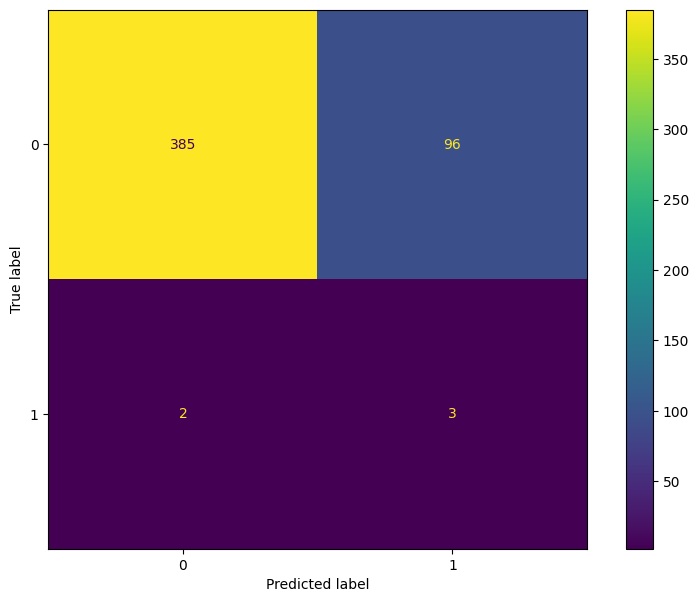

In [73]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred_dt = dt_Grid.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_dt, labels=dt_Grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_Grid.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Based on confusion matrix:

1. We successfully predicted 416 patients with no disease and 5 with disease
2. There are 65 patiends who are predicted to have disease when they actually won't
3. There are 0 patiends who are predicted to not have disease when they actually do

# Feature Importance

# DecisionTreeClassifier

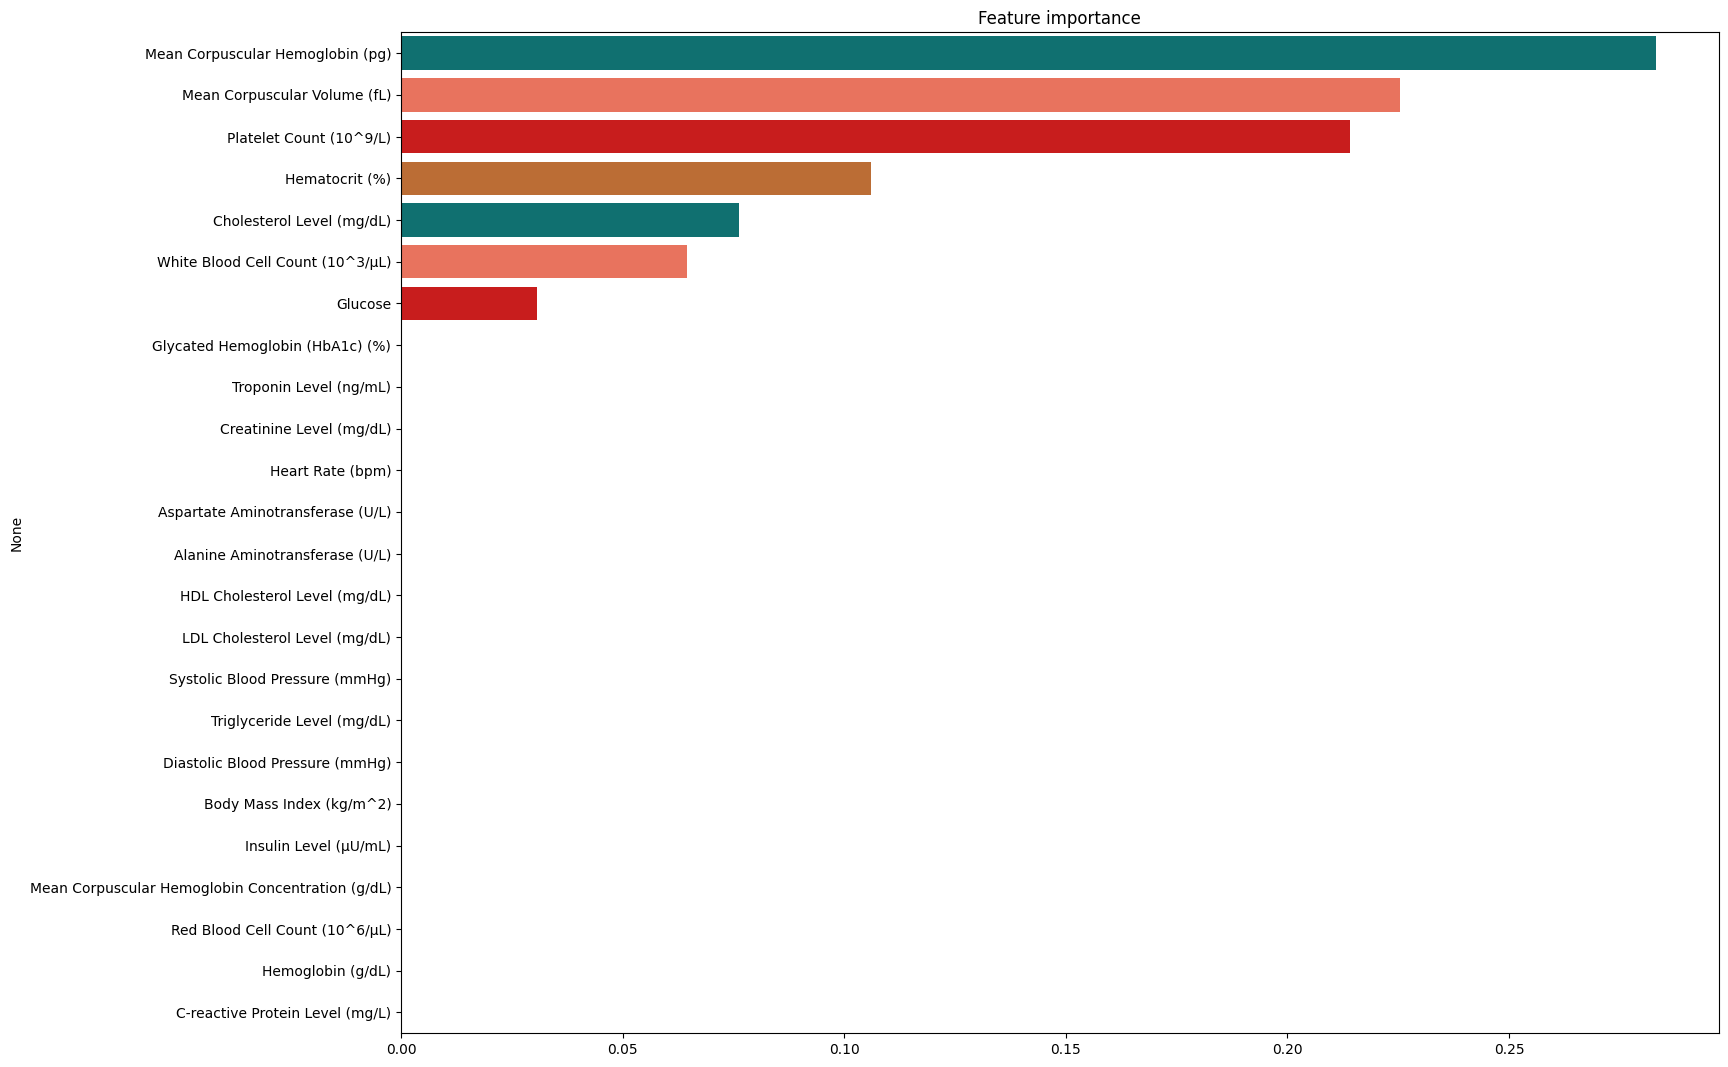

In [75]:
fimp = pd.Series(data=dtmodel.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')


# Conclusion

Looking at model results, the best Precision on the test set is achieved by  RandomForest Classifier with 0.89 . 

Given the high imbalance of the data towards non-churners, it makes sense to compare F1 scores to get the model with the best 

score on jointly precision and recall. This would also be the  RandomForest Classifier with a F1 score of 0.90 .

Given the scores of the best performing models, it can be observed that F1 scores are not much above 90%. 

Further optimization efforts should be carried out to achieve a higher scores and thereby increase prediction power for more 

business value.

When we consider the Exploratory Data Analysis we did, it is clear that this company has some issue with their Month-to-month

customers.

What kind of incentives can this company offer to customers to get them to sign One-year or Two-year contracts?

What adjustments can be made to Month-to-Month contracts that would be more favorable to customers, without taking away the

appeal of a One-year or Two-year contract?

For RandomForest Classifier, you can see TotalCharges has a positive influence on the data and some features like

InternetService_fibreoptics,contract_one year and etc should be examine critically since it has negative impact on the target column.

 Recommendation and Request

We should pay more attention to customers who meet the criteria below

1. Contract: Month-to-month
2. Tenure: Short tenure
3. Internet service: Fiber optic
4. Payment method: Electronic check